In [ ]:
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/finance_course/2022/lesson5')

Mounted at /content/drive


## Posizioni Aperte presso Direzione Rischio BMPS

* link alle offerte di stage sul canale AlmaLaurea (scadenza il 31 ottobre):

[BMPS Integrazione rischi e reporting](https://unisi.almalaurea.it/lau/annunci/bachecaannunci.aspx/613040?lang=it&tipobacheca=TIROLAV)

[BMPS Analisi di rischio di controparte](https://unisi.almalaurea.it/lau/annunci/bachecaannunci.aspx/609966?lang=it&tipobacheca=TIROLAV)

[BMPS Modelli di probabilità di default](https://unisi.almalaurea.it/lau/annunci/bachecaannunci.aspx/611990?lang=it&tipobacheca=TIROLAV)

[BMPS Rating interno/analisi statistiche portafoglio](https://unisi.almalaurea.it/lau/annunci/bachecaannunci.aspx/612069?lang=it&tipobacheca=TIROLAV)

[BMPS Monitoraggio rischio liquidità](https://unisi.almalaurea.it/lau/annunci/bachecaannunci.aspx/611433?lang=it&tipobacheca=TIROLAV)

[BMPS Reporting/Analisi rischio portafogli](https://unisi.almalaurea.it/lau/annunci/bachecaannunci.aspx/611966?lang=it&tipobacheca=TIROLAV)

* **gli interessati possono candidarsi inviando una email con il CV a orienta@mps.it (Oggetto: candidatura stage direzione risk)**

* link per candidarsi pubblicato sul sito della Banca, generico per tutte le posizioni:

[Job Search (mps.it)](https://lavoraconnoi.mps.it/careersection/ex/joblist.ftl?_ga=2.220808283.274399112.1666599241-1542193542.1648648575) 

## Interest Rate Derivatives

### Interest Rate Swaps

* Interest rate swaps (IRS) consist of a floating leg and a fixed leg. The contract parameters are:
  * start date $d_0$
  * notional $N$
  * fixed rate $K$
  * floating rate tenor (months)
  * maturity (years)


* **floating leg**: pays the reference EURIBOR fixing at a frequency equal to the index tenor:
    * so for example an IRS on a 3-month EURIBOR will pay a floating coupon every three months.


* **fixed leg**: pays a predetermined cash flow at annual frequency:
    * for simplicity we will only consider swaps with maturities which are multiples of 1 year.

### Valuation

* Notation
    * $d_i^{\mathrm{fixed}}, d_i^{\mathrm{float}}$ be the fixed leg payment dates and floating leg payment dates;
    * $d$ the pricing date;
    * $D(d, d')$ the discount factor observed in date $d$ for the value date $d'$;
    * $F(d, d', d'')$ the forward rate observed in date $d$ for the period $[d', d'']$;  
    * $\tau = \frac{d_{j}^{\mathrm{float}}-d_{j-1}^{\mathrm{float}}}{360}$ the tenor.


* The NPV of the fixed leg is calculated as follows:

$$\mathrm{NPV}_{\mathrm{fixed}}(d, K) = N\cdot K\cdot\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}})$$

* while the NPV of the floating leg is calculated as follows:

$$\mathrm{NPV}_{\mathrm{float}}(d, F) = N\cdot\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \tau
\cdot D(d, d_{i}^{\mathrm{float}})$$

* Therefore the NPV of the swap (seen from the point of view of the counter-party which receives the floating leg) is

$$\mathrm{NPV}(d, F, K) = \mathrm{NPV}_{\mathrm{float}}(d,F) - \mathrm{NPV}_{\mathrm{fixed}}(d,K)$$

* It's actually more convenient to express the NPV of an IRS as a function of the fair value fixed rate $S$ of the IRS (**swap rate**)
    * $S$ is the value of $K$ which makes $\mathrm{NPV}=0$.

$$\mathrm{NPV}_{\mathrm{fixed}}(d, S) = \mathrm{NPV}_{\mathrm{float}}(d, F)\\[20pt]$$
$$N\cdot S\cdot\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}}) = N\cdot\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot\tau\cdot D(d, d_{i}^{\mathrm{float}})\\[20pt]$$
$$S=\frac{\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \tau\cdot D(d, d_{i}^{\mathrm{float}})}{\sum_{i=1}^{n}D(d, d_i^{\mathrm{fixed}})}\\[20pt]$$


* Once calculated $S$, we can express the $\mathrm{NPV}$ of an IRS as follows:

$$\begin{align}&\mathrm{NPV}(d, F, K) = \mathrm{NPV}_{\mathrm{float}}(d, F) - \mathrm{NPV}_{\mathrm{fixed}}(d, K) = & \\ \\ &= \underbrace{\mathrm{NPV}_{\mathrm{float}}(d, F) - \mathrm{NPV}_{\mathrm{fixed}}(d, S)}_{\mathrm{=\;0}} + \mathrm{NPV}_{\mathrm{fixed}}(d, S) - \mathrm{NPV}_{\mathrm{fixed}}(d, K) & \\ & = N\cdot(S-K)\cdot\underbrace{\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}})}_{\mathrm{annuity}}\end{align}$$

In [ ]:
# implement InterestRateSwap 
from finmarkets import generate_dates


* The relevant inputs have been saved in [euribor_curve.xlsx](https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/euribor_curve.xlsx) and [discount curve.xlsx](https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/discount_factors_2022-10-05.xlsx)

In [ ]:
# import xlsx and define discount and euribor curves
import pandas as pd
from datetime import date
from finmarkets import DiscountCurve, ForwardRateCurve
from dateutil.relativedelta import relativedelta


* Test our class instantiating an IRS with 1M notional, fixed rate of 2.3%, 3 month tenor and a maturity of 4 years.

In [ ]:
# test IRS
#start_date = pricing_date
notional = 1e6
fixed_rate = 0.023
tenor = 3 # months
maturity = 4 # years


* Can you guess what could be the **swap rate** given the value obtained for the NPV ? 
    * in particular will it be higher or lower than the IRS fixed rate of 2.3% ?
    * (remember that we are looking at this contracts from the point of view of the receiver of the floating leg...)

In [ ]:
# check the swap rate


* To check if the we have computed correctly the swap rate we can instanciate a new IRS with fixed rate equal to the just calculated swap rate and print its NPV, it should come very close to 0.

In [ ]:
# check NPV of new IRS



## Interest Rate Swaptions

* Swaptions are the equivalent of European options for the interest rate markets
    * they give the option holder the right but not the obligation, at the exercise date $d_{ex}$, to enter into an Interest Rate Swap at a pre-determined fixed rate.
    * the option holder will only choose to do this if the NPV of the underlying swap at $d_{ex}$ is positive.
    
    
* From the IRS NPV expression in terms of the swap rate $S$ therefore, we can see that the payoff of the swaption is

$$N\cdot \mathrm{max}(0, S(d_{\mathrm{ex}}) - K)\cdot\sum D(d, d_i^{\mathrm{fixed}})$$

* The key issue is now to estimate $S(d_{\mathrm{ex}})$ in order to evaluate the payoff of a swaption. 


* This will be shown with two alternative approaches.

#### Evaluation through Black-Scholes formula

* Here we'll use a generalization of the Black-Scholes-Merton formula applied to swaptions:

$$\mathrm{NPV} = N\cdot A\cdot [S \Phi(d_+) - K\Phi(d_-)]$$

* where $\Phi$ represents the cumulative distribution function of the normal distribution

$$d_{\pm} = \frac{\mathrm{log}(\frac{S}{K}) \pm \frac{1}{2}\sigma^{2}T}{\sigma\sqrt{T}}\qquad(\sigma~\textrm{is the volatility of the swap rate})$$

$$A =\sum_{i=1}^{p}D(d, d_{i}^{\mathrm{fixed}})\qquad\mathrm{(annuity})$$


* Consider a swaption whose underlying 6M-IRS has a notional of 1M, fixed rate of 5%, a maturity of 4 years, and in addition a swap rate volatility of 15%.

#### Evaluation through Monte-Carlo Simulation

* Here it is assumed that the swap rate $S$ evolves following a log normal process
    * its distribution at $d_{\mathrm{ex}}$ (exercise date) is $S(d_{\mathrm{ex}}) = S(d)\mathrm{exp}(-\frac{1}{2}\sigma^{2}T+\sigma\sqrt{T}\mathcal{N}(0,1))$;
    * notice that it is assumed that the *drift* rate in the evolution of the swap rate is zero.

* To simulate the swap rate we can:
    1. sample the normal distribution $\mathcal{N}(0, 1)$ to calculate a large number of scenarios for $S(d_{\mathrm{ex}})$;
    2. evaluate the underlying swap's NPV at the exercise date, and consequently the swaption's payoff, for each scenario;
    3. take the average of these values to get the final estimate.

Further the 95% confidence level for the swaption simulation can be calculated.

In [ ]:
# implement MC swaption payoff
import numpy as np
from numpy.random import normal, seed
from scipy.stats import norm 
from datetime import date
from dateutil.relativedelta import relativedelta


In [ ]:
seed(1)

pricing_date = date.today()
start_date = pricing_date + relativedelta(years=1)
exercise_date = start_date
volatility = 0.15
fixed_rate = 0.03
tenor = 3 # months
maturity = 4 # years


## Credit curves

* A **credit event** can be a default, the failure to make payments, the issuer entering into bankruptcy proceedings, or the occurence of other legal events...
  * for simplicity credit event = *default*;
* **non-default probability** or survival probability ($P_{\textrm{sur}}$): probability that the issuer of a contract will not suffer a credit event before a given date 
  * **non-default probability is a cumulative probability** since refers to a certain time horizon (e.g. I say "company X has a 85% probability of not defaulting in the next two years"). 

  1. $P_{\textrm{sur}}(t)$ since is a cumulative prob. means $P_{\textrm{sur}}(t_0, t)$ !
  2. $P_{\textrm{sur}}(t_0, t) = 1 - P_{\textrm{def}}(t_0, t)$
  3. $P_{\textrm{sur}}(t_0, t) = P_{\textrm{def}}(t, +\infty)$

* Just like discount factors are represented through discount curves, so survival probabilities are by **credit curves**.


### Hazard Rate
* Hazard rate measures the instantaneous default probability of a company *conditioned* on not having defaulted until that moment.

* Hazard rate is often called a *conditional failure rate* since it's expression is a direct application of the conditional probability concept.

  * It answers to the question "how should you update probabilities of an events when there is additional information available ?". 

$$P(A|B) = \cfrac{P(A\cap B)}{P(B)}$$

<center>
<img src="https://drive.google.com/uc?id=16bF8jTwIMLPPDK2vIP99CV-RcBJTocyk" width=500>
</center>

$$\lambda(t) = \lim_{dt\rightarrow 0} \cfrac{P_{\textrm{def}}(t, t+dt|\tau\gt t)}{dt} = \cfrac{dP_{\textrm{def}}(t)}{P_{\textrm{def}}(t, +\infty)}\cfrac{1}{dt} = \cfrac{d(1-P_{\textrm{sur}}(t))}{P_{\textrm{sur}}(t_0, t)}\cfrac{1}{dt} = -\cfrac{dP_{\textrm{sur}}}{dt}\cfrac{1}{P_{\textrm{sur}}(t_0, t)}$$

* where the default (survival) probability is indicated by $P_{\textrm{def}}$ ($P_{\textrm{sur}}$), the hazard rate by $\lambda$ and the time of default with $\tau$. The minus sign derives from the fact that $P_{\textrm{sur}}$ is a **non** default probability while the hazard rate is defined in terms of the probability of default $P_{\textrm{def}}$.

$$P_{\textrm{def}}(t, +\infty) = (1-P_{\textrm{def}}(t_0, t)) = (1-(1 - P_{\textrm{sur}}(t_0, t)) =  P_{\textrm{sur}}(t_0, t)$$

* Given the hazard rate the survival probability can be determined as:

$$\lambda(t) = -\cfrac{1}{dt}\cdot\cfrac{dP_{\textrm{sur}}}{P_{\textrm{sur}}} = -\cfrac{d(\textrm{log}P_{\textrm{sur}})}{dt}\\[5pt]$$

$$P_{\textrm{sur}}(t_0, t) = e^{-\int_{t_0}^{t}\lambda(s) ds}$$

For example a constant hazard rate results in the following probabilities:

$$P_{\textrm{sur}}(t_0, t) = e^{-\lambda (t-t_0)}$$

$$P_{\textrm{def}}(t_0, t) = 1 - e^{-\lambda (t-t_0)}$$



### CreditCurve class

In [ ]:
# implement CreditCurve class
from numpy import interp
from dateutil.relativedelta import relativedelta


In [ ]:
# set observation_date and CreditCurve
from datetime import date
from dateutil.relativedelta import relativedelta


## Credit Deafult Swaps

* A Credit Default Swap (CDS) is a financial agreement where the seller will compensate the buyer in case of a credit event of a reference entity. 
  * In other words the seller of the CDS *insures* the buyer against possible credit events. 
* To get such *protection* the CDS buyer makes a series of payments (the "spread") to the seller and, in exchange, may expect to receive a payoff if the asset defaults. 

* CDSs are made up of two legs:
    * **default** leg: which pays $LGD = F(1 - R)$ if and when the credit event occurs;
      * $LGD$ is the **loss given default**, $F$ the face value of the contract and $R$ is the recovery rate (usually set around 40%);
    * **premium** leg: which pays the *spread* $S$ every m months until the credit event occurs or the contract expires.

### Valuation

* $d$ today's date;
* $d_0$ the start date of the CDS (could be different from $d$);
* $d_1, ..., d_n$ the payment dates of the premium leg, which occur at a m-month frequency (we assume that $d_n$ is the end date of the CDS);
* $D(d')$ the discount factor between $d$ and $d'$;
* $P_{\textrm{sur}}(d')$ the survival probability between $d$ and $d'$;
* $\tau$ the random variable representing the date of the credit event.

<center>

| Premium Leg | | Default Leg |
|-------------|-|-------------|
|$$\textrm{NPV}_{\textrm{premium}} = F\cdot S\cdot \sum_{i=1}^{n} D(d_i) \cdot P_{\textrm{sur}}(d_i)$$| |$$\mathrm{NPV_{default}} = F(1-R) \sum_{d'=d_0}^{d_n} D(d') \left( P_{\textrm{sur}}(d') - P_{\textrm{sur}}(d'+1) \right)$$|

</center>


In [ ]:
from finmarkets import generate_dates


* Below a simple test of the class, using [discount curve.xlsx](https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/discount_factors_2022-10-05.xlsx).

In [ ]:
# test CDS class with previous inputs 
import pandas as pd
from finmarkets import DiscountCurve
from dateutil.relativedelta import relativedelta
from datetime import date

F = 1e6
spread = 0.03
maturity = 3


### Determine Default Probabilities from Bond Prices

* The price of a bond is directly linked to the credit rating of the issuer. There is always an associated default risk: the borrower might not be able to repay the loan.
    * Bonds with low ratings (*junk bonds*) are sold at lower prices since riskier;
    * high ratings bonds (*investment-grade bonds*) are sold at higher prices.

* The average hazard rate can be approximated by considering the spread $s$ between a risky bond yield and the risk-free rate, and $R$ the recovery rate. 
    
* The risk-free zero coupon bond value $e^{-(r+s)\cdot T}$ equals that of the risky bond which can be computed remembering the expression for the default probability as a function of a constant hazard rate

$$
e^{-(r+s)\cdot T} = 
\begin{cases}
R\;\;\textrm{with probability}\;1 - e^{-\lambda T} \\
1\;\;\textrm{with probability}\;e^{-\lambda T} \\
\end{cases} = 
(e^{-\lambda T} + R - R e^{-\lambda T})e^{-rT}
$$

* If $\lambda$ is small we can use the first order Taylor expansion
$e^{x} = 1 + x + \mathcal{O}(x^2)$ 

$$\begin{gathered}
e^{-sT} = e^{-\lambda T} + R - R e^{-\lambda T} \\ \\
1 - sT = 1 - \lambda T + R - R + R\lambda T \\ \\
-s = -(1-R)\lambda \\ \\
s = (1 - R)\cdot \lambda \implies \bar{\lambda} = \frac{s}{1-R}
\end{gathered}
$$
Imagine for example a bond that yields 150 basis points more than a similar risk-free bond and assume an expected recovery rate of 40\%.

$$
\bar{\lambda} = \cfrac{0.015}{(1-0.4)} = 2.5\%
$$

## Estimate Default Probabilities from CDS

<center>

| Discount Curve ($dc$) | | Credit Curve ($cc$) |
|----------------|-|-------------|
| OIS fair values| | CDS fair values| 
|$$NPV_{OIS}(dc)=0\underset{\textrm{bootstrap}}{\implies} dc = NPV^{-1}_{OIS}$$| |$$NPV_{CDS}(cc)=0\underset{\textrm{botstrap}}{\implies} cc = NPV^{-1}_{CDS}$$

</center>

1. collect market quotes for a number of CDS with different maturities;
2. create the corresponding CDS objects;
3. define a credit curve whose pillars are the CDS maturity dates and the survival probabilities are unknown;
4. define an objective function to minimize the sum of the squared CDS's NPVs;
5. set the non-default probabilities to an initial value and define their range of variability between [0, 1] since they are probabilities and fix "today's" probability to 1 since there hasn't been any default;
6. run the minimization.

* The file with a test set of market quotes is [cds_quotes.xlsx](https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/cds_quotes.xlsx).

In [ ]:
# bootstrapping for CDS
from scipy.optimize import minimize
import pandas as pd
import numpy as np


### Credit Suisse

"*This morning Credit Suisse reached its minimum of 3.52 CHF (-11,5%)...After Archegos and Greensill scandals analysists says three options are left: CS could straighten up by itself (a "miracle"), could be acquired by another bank or saved by Swiss Governament aids.*" (RSI News, 2022-10-03)

<center>

![](https://drive.google.com/uc?id=1fh5oWBwsNtV6_QFSlCPtO1NAaUhHjJj3)

</center>

In [ ]:
!pip install yfinance


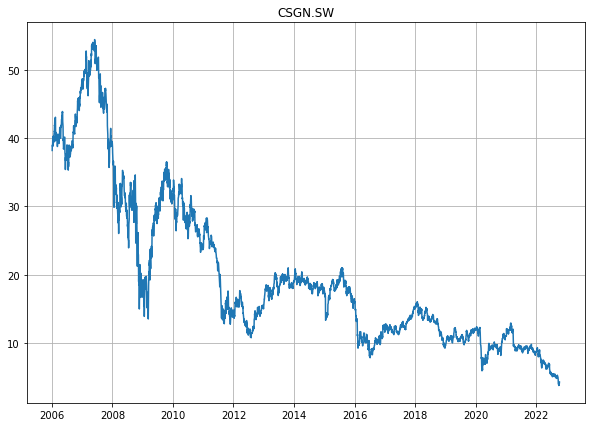

In [ ]:
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt

proxy = yf.Ticker('CSGN.SW')
data = proxy.history(start='2006-01-05')['Close']

plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(data)
plt.grid(True)
plt.title("CSGN.SW")
plt.show()

